# Machine Learning Classification Model

# Dataset - Sample_for_AI

# Step 1 - Importing Libraries

In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Step 2- Load the Dataset

In [3]:
#load the dataset using pandas
data = pd.read_csv('Sample_for_AI (1) (1).csv')

In [4]:
data

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.00,NaN,API
1,2,No,No,No,5.0,674,2.50,NaN,API
2,3,Yes,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.00,NaN,Landing Page Submission
...,...,...,...,...,...,...,...,...,...
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [5]:
#Top 5 rows
data.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission


In [6]:
#bottom 5 rows
data.tail()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission
9239,9240,Yes,No,No,6.0,1279,3.00,Supply Chain Management,Landing Page Submission


# Step 3 - Data Preprocessing

In [7]:
#get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9240 non-null   int64  
 1   Purchased                    9240 non-null   object 
 2   Do Not Email                 9240 non-null   object 
 3   Do Not Call                  9240 non-null   object 
 4   TotalVisits                  9103 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9103 non-null   float64
 7   Specialization               5860 non-null   object 
 8   Origin                       9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [8]:
data.shape

(9240, 9)

In [9]:
data.dtypes

ID                               int64
Purchased                       object
Do Not Email                    object
Do Not Call                     object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Origin                          object
dtype: object

In [10]:
data.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64


In [12]:
#cheking duplicates in dataset
data.duplicated().sum()

0

In [13]:
#Droping all unnecessary columns
data.drop(['ID','Do Not Email','Do Not Call'],axis=1,inplace=True)

In [14]:
# Handle missing values (example: filling with mean)
data['TotalVisits'].fillna(data['TotalVisits'].mean(), inplace=True)

In [15]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].mean(), inplace=True)

In [16]:
#Handiling missing values in categorical columns

In [17]:
data['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [18]:
data['Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [19]:
import pandas as pd
null_percentage = data['Specialization'].isnull().mean() * 100
print("Null Percentage in Specialization:", null_percentage)

Null Percentage in Specialization: 36.58008658008658


In [20]:
# categorical_colms = ['Specialization']
# for colm in categorical_colms:
#     mode_value = data[colm].mode()[0]  # Calculate the mode
#     data[colm].fillna(mode_value, inplace=True)  # Fill missing values with mode

In [21]:
import pandas as pd
# Assuming your DataFrame is named 'data' and the column is named 'Specialization'
data.dropna(subset=['Specialization'], inplace=True)

In [22]:
print(data.isna().sum())
print()
print(f'There no missing values in dataset')

Purchased                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

There no missing values in dataset


In [23]:
data.dtypes

Purchased                       object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Origin                          object
dtype: object

In [24]:
data

,Purchased,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,Yes,2.0,1532,2.00,Business Administration,Landing Page Submission
3,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
6,Yes,2.0,1640,2.00,Supply Chain Management,Landing Page Submission
8,No,2.0,71,2.00,IT Projects Management,Landing Page Submission
9,No,4.0,58,4.00,Finance Management,API
...,...,...,...,...,...,...
9235,Yes,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,Yes,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [25]:
data.isna().sum()

Purchased                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Specialization                 0
Origin                         0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
# Assuming the categorical column is named 'Specialization'
encoder = LabelEncoder()
data['Specialization'] = encoder.fit_transform(data['Specialization'].astype(str))

In [27]:
from sklearn.preprocessing import LabelEncoder
# Assuming the categorical column is named 'Origin'
encoder = LabelEncoder()
data['Origin'] = encoder.fit_transform(data['Origin'].astype(str))

In [28]:
data.dtypes

Purchased                       object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                   int32
Origin                           int32
dtype: object

In [29]:
data

,Purchased,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,Yes,2.0,1532,2.00,1,1
3,No,1.0,305,1.00,11,1
6,Yes,2.0,1640,2.00,16,1
8,No,2.0,71,2.00,8,1
9,No,4.0,58,4.00,4,0
...,...,...,...,...,...,...
9235,Yes,8.0,1845,2.67,8,1
9236,No,2.0,238,2.00,11,1
9237,No,2.0,199,2.00,1,1
9238,Yes,3.0,499,3.00,7,1


<Axes: >

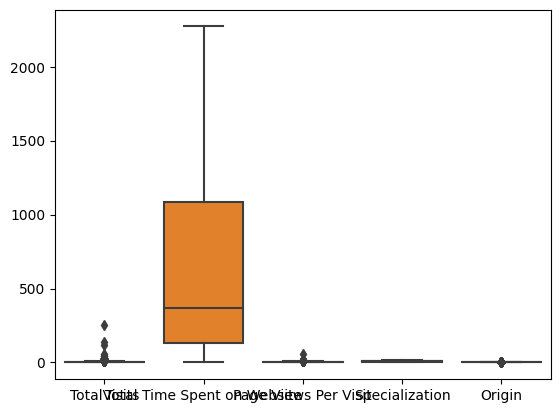

In [30]:
#cheking for outliers
sns.boxplot(data)

In [31]:
# Winsorization for 'TotalVisits'
pct_99 = data['TotalVisits'].quantile(0.99)
data['TotalVisits'] = data['TotalVisits'].clip(lower=data['TotalVisits'].quantile(0.01), upper=pct_99)

# Winsorization for 'Page Views Per Visit'
pct_99 = data['Page Views Per Visit'].quantile(0.99)
data['Page Views Per Visit'] = data['Page Views Per Visit'].clip(lower=data['Page Views Per Visit'].quantile(0.01), upper=pct_99)


<Axes: >

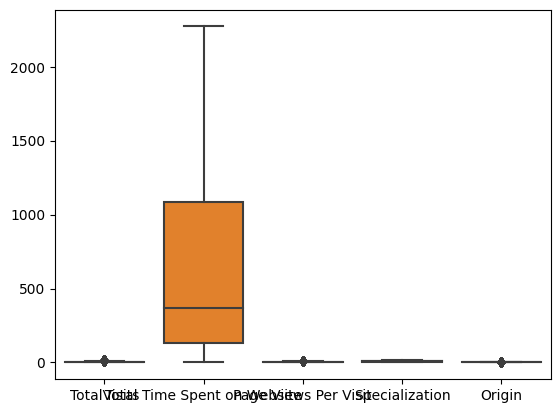

In [32]:
sns.boxplot(data)

In [33]:
# # Assuming your DataFrame is named 'data' and the column is named 'Specialization'
# empty_rows = data[data['Specialization'] == ''].index
# empty_data = data.loc[empty_rows]

# # Display the rows with empty strings in the 'Specialization' column
# print(empty_data)


# Step 4 - Exploratory Data Analysis (EDA)

In [34]:
# Descriptive statistics
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
        TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  5860.000000                  5860.000000           5860.000000   
mean      4.234840                   607.197782              2.990954   
std       3.258599                   556.198478              1.901446   
min       0.000000                     0.000000              0.000000   
25%       2.000000                   132.750000              2.000000   
50%       4.000000                   369.500000              3.000000   
75%       5.000000                  1087.250000              4.000000   
max      18.000000                  2272.000000             10.000000   

       Specialization       Origin  
count     5860.000000  5860.000000  
mean         7.731741     0.963652  
std          4.589894     0.442506  
min          0.000000     0.000000  
25%          4.000000     1.000000  
50%          7.000000     1.000000  
75%         11.000000     1.000000  
max         17.000000

In [35]:
data.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
TotalVisits,1.000000,0.169238,0.592958,0.011991,-0.150211
Total Time Spent on Website,0.169238,1.000000,0.162282,0.011324,-0.141592
Page Views Per Visit,0.592958,0.162282,1.000000,0.022291,-0.120793
Specialization,0.011991,0.011324,0.022291,1.000000,-0.052701
Origin,-0.150211,-0.141592,-0.120793,-0.052701,1.000000


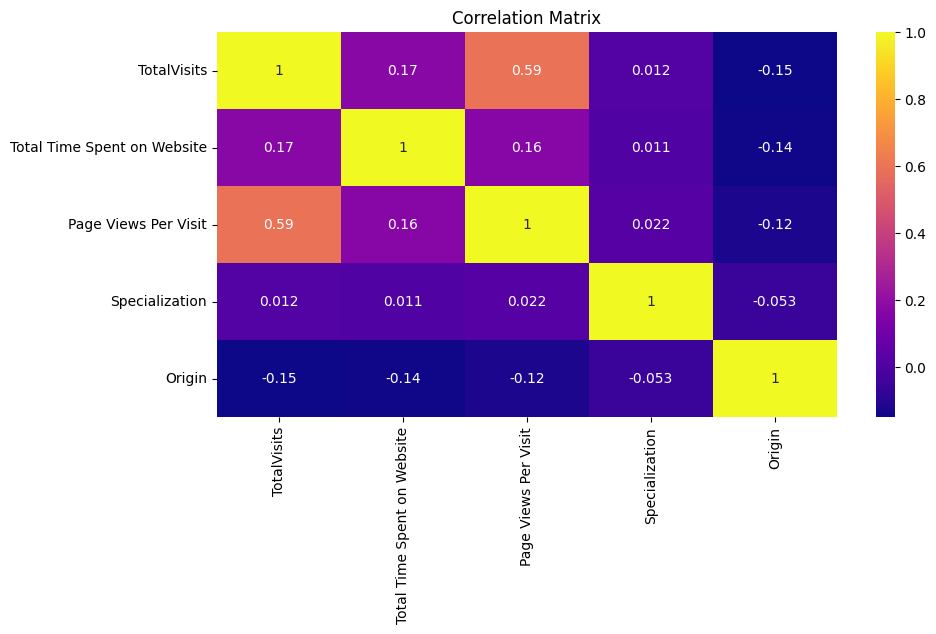

In [36]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True,cmap = "plasma")
plt.title("Correlation Matrix")
plt.show()

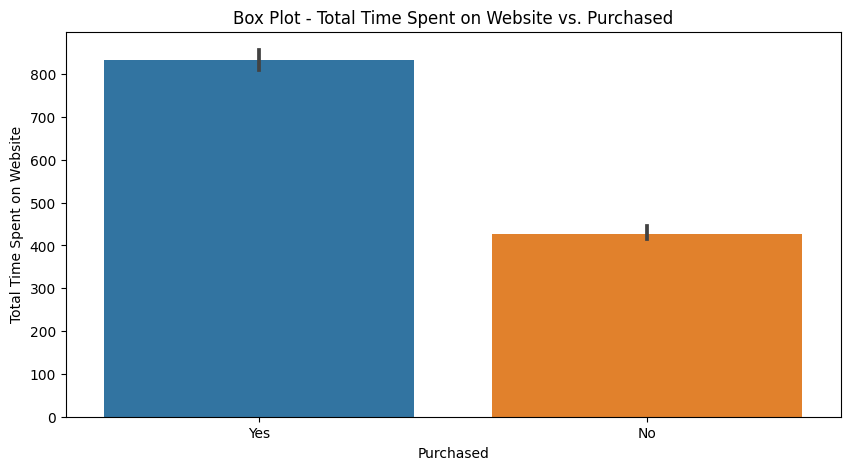

In [37]:
# Box plot
plt.figure(figsize=(10,5))
sns.barplot(x='Purchased', y='Total Time Spent on Website', data=data)
plt.title("Box Plot - Total Time Spent on Website vs. Purchased")
plt.show()

In [38]:
data.columns

Index(['Purchased', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization', 'Origin'],
      dtype='object')

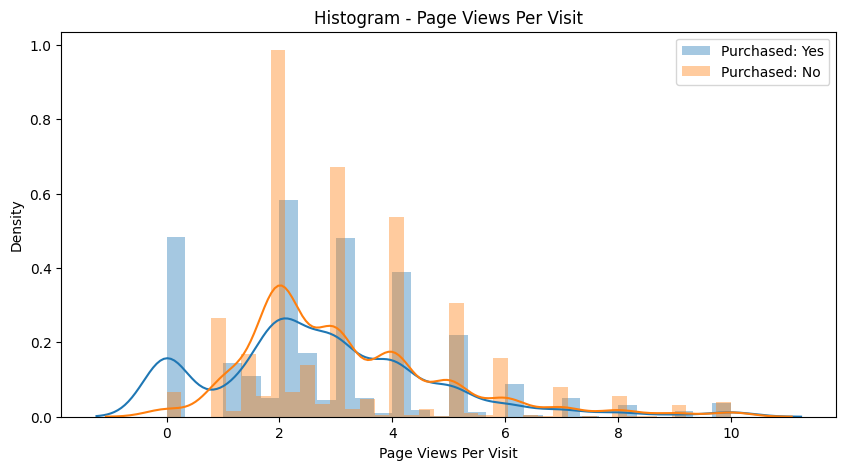

In [39]:
# Histogram
plt.figure(figsize=(10,5))
sns.distplot(data['Page Views Per Visit'][data['Purchased'] == 'Yes'], kde=True, label='Purchased: Yes')
sns.distplot(data['Page Views Per Visit'][data['Purchased'] == 'No'], kde=True, label='Purchased: No')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Density')
plt.title('Histogram - Page Views Per Visit')
plt.legend()
plt.show()

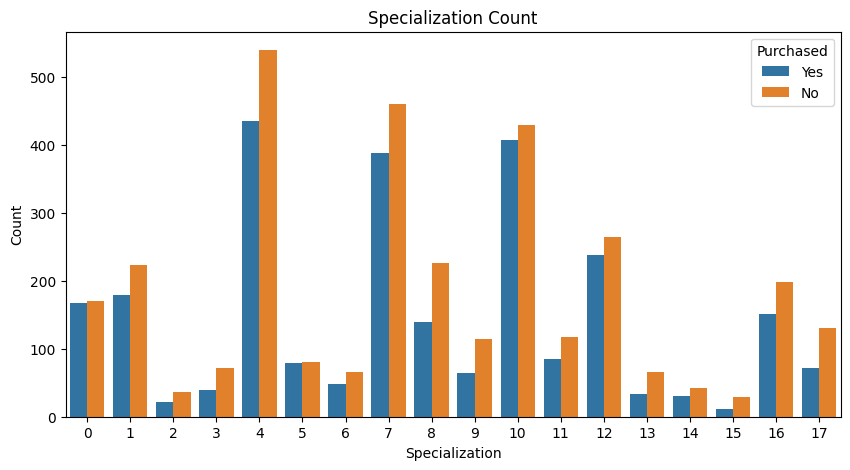

In [40]:
# Bar plot
plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', hue='Purchased', data=data)
plt.title("Specialization Count")
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.show()

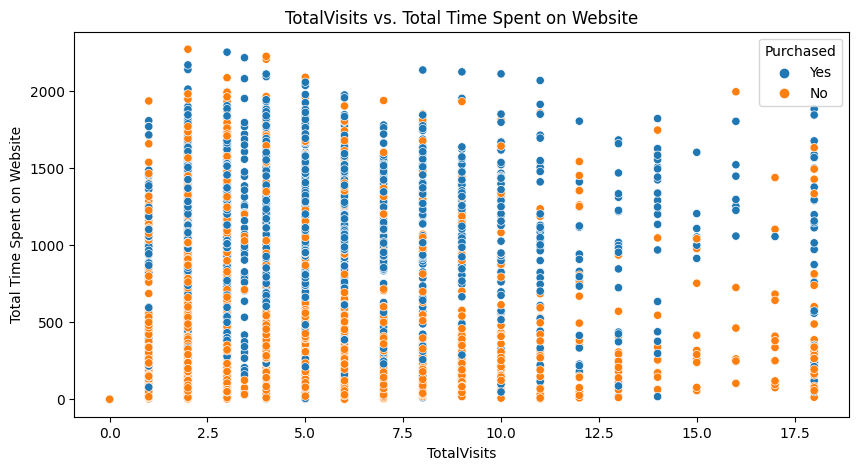

In [41]:
# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalVisits', y='Total Time Spent on Website', hue='Purchased', data=data)
plt.title("TotalVisits vs. Total Time Spent on Website")
plt.xlabel("TotalVisits")
plt.ylabel("Total Time Spent on Website")
plt.show()

<Figure size 1000x500 with 0 Axes>

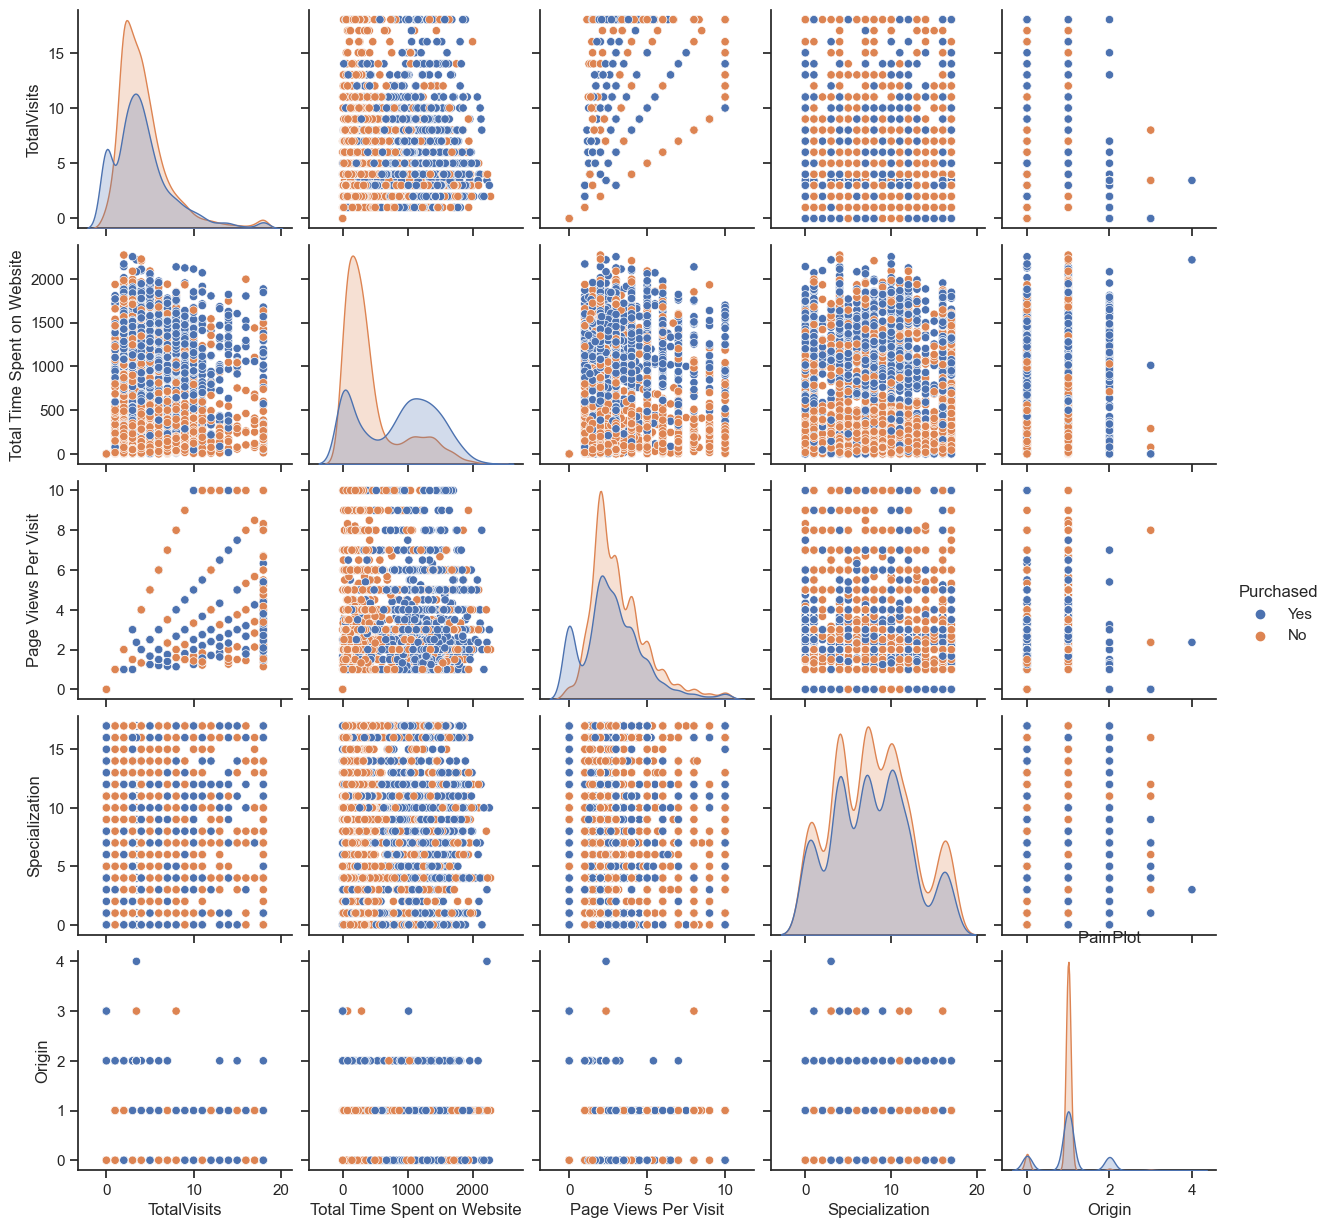

In [42]:
# Pair plot
sns.set(style="ticks")
plt.figure(figsize=(10,5))
sns.pairplot(data, hue="Purchased", diag_kind="kde")
plt.title("Pair Plot")
plt.show()

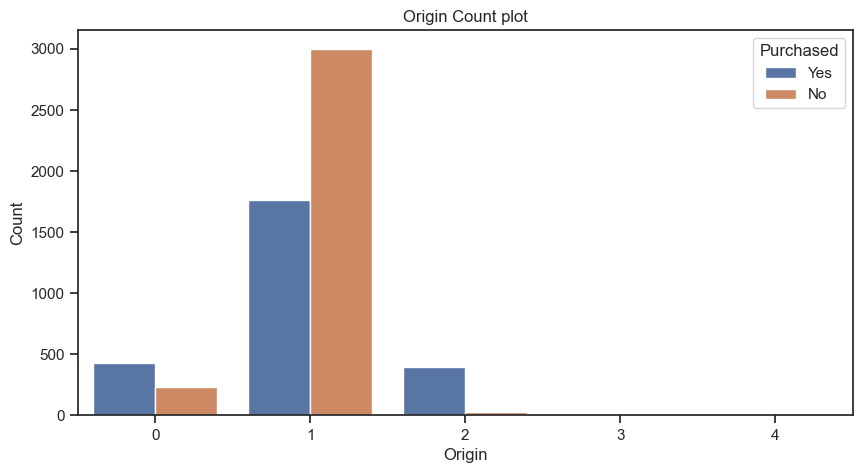

In [43]:
# Count plot
plt.figure(figsize=(10,5))
sns.countplot(x='Origin', hue='Purchased', data=data)
plt.title("Origin Count plot")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.show()

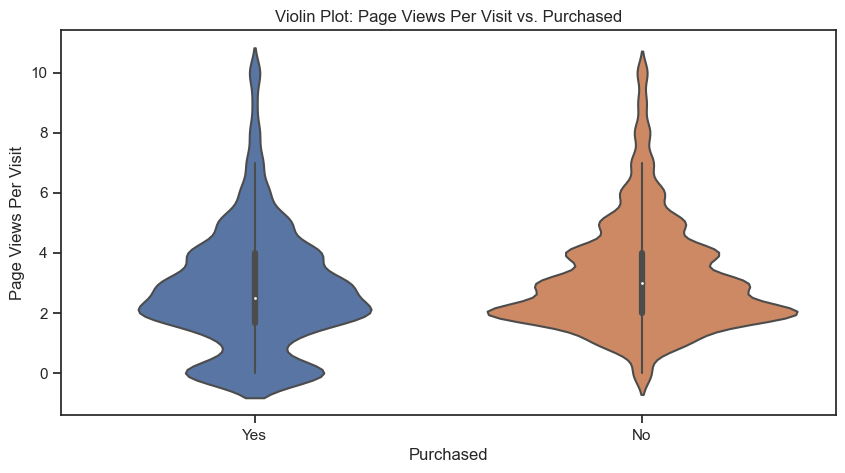

In [44]:
# Violin plot
plt.figure(figsize=(10,5))
sns.violinplot(x='Purchased', y=data['Page Views Per Visit'], data=data)
plt.title("Violin Plot: Page Views Per Visit vs. Purchased")
plt.xlabel("Purchased")
plt.ylabel("Page Views Per Visit")
plt.show()

# Step 5 - Feature Engineering

In [45]:
data.columns

Index(['Purchased', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization', 'Origin'],
      dtype='object')

In [46]:
X = data.drop('Purchased', axis=1)
y = data['Purchased']

In [47]:
X.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,2.0,1532,2.0,1,1
3,1.0,305,1.0,11,1
6,2.0,1640,2.0,16,1


In [48]:
y.head(3)

2    Yes
3     No
6    Yes
Name: Purchased, dtype: object

In [49]:
# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X_encoded[col])

In [50]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [51]:
X_scaled

array([[-0.68588688,  1.66286168, -0.52120275, -1.46676918,  0.08214862],
       [-0.99279342, -0.5433736 , -1.04716319,  0.71211629,  0.08214862],
       [-0.68588688,  1.85705354, -0.52120275,  1.80155903,  0.08214862],
       ...,
       [-0.68588688, -0.73396931, -0.52120275, -1.46676918,  0.08214862],
       [-0.37898033, -0.19454748,  0.0047577 , -0.1594379 ,  0.08214862],
       [ 0.54173931,  1.20794927,  0.0047577 ,  1.80155903,  0.08214862]])

In [52]:
# Encode the target variable using label encoding
y = label_encoder.fit_transform(y)

In [53]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [54]:
y.shape

(5860,)

In [55]:
X_scaled.shape

(5860, 5)

# Step 6 - Splitting Dataset Training and Testing set

In [56]:
#splitting the data into training and testing set

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [59]:
x_train

array([[-0.07207378,  0.86092123,  0.53071814,  0.05845065,  0.08214862],
       [ 0.23483276,  0.46534522,  1.05667859, -1.68465773,  0.08214862],
       [-0.68588688, -0.10284577, -0.52120275,  0.49422774,  0.08214862],
       ...,
       [-0.37898033, -0.99468986,  0.0047577 , -1.24888064,  0.08214862],
       [-0.68588688, -0.90119008, -0.52120275,  0.49422774,  0.08214862],
       [-1.29969997, -1.09178579, -1.57312364,  0.49422774,  2.34219988]])

In [60]:
x_test

array([[-0.68588688, -0.85803633, -0.52120275,  0.49422774,  0.08214862],
       [-0.68588688, -0.41930658, -0.52120275, -0.59521499,  0.08214862],
       [ 0.84864586, -0.70699822,  2.10859948,  0.49422774,  0.08214862],
       ...,
       [-0.07207378, -0.47684491, -0.52120275, -0.1594379 ,  0.08214862],
       [ 0.23483276, -0.67463291,  1.05667859,  0.05845065,  0.08214862],
       [-1.29969997, -1.09178579, -1.57312364, -0.81310354, -2.17790264]])

In [61]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [62]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

# Step 7 -  Model Building

# Model 1 - Logistion Regression

In [63]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
y_pred  = model_1.predict(x_test)

In [64]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.7112627986348122

Precision Score:  0.7104722792607803

Recall Score:  0.5509554140127388

F1 Score:  0.6206278026905829


# Model 2 - Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(x_train,y_train)
y_pred  = model_2.predict(x_test)

In [66]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.7522184300341297

Precision Score:  0.7133655394524959

Recall Score:  0.7054140127388535

F1 Score:  0.7093674939951962


# Model 3  - Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
model_3 = GradientBoostingClassifier()
model_3.fit(x_train,y_train)
y_pred  = model_3.predict(x_test)

In [68]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.7877133105802048

Precision Score:  0.7397881996974282

Recall Score:  0.7786624203821656

F1 Score:  0.7587276958882855


# Model 4 - Support Vector Machines

In [69]:
from sklearn.svm import SVC
model_4 = SVC()
model_4.fit(x_train,y_train)
y_pred  = model_4.predict(x_test)

In [70]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.7802047781569966

Precision Score:  0.7383177570093458

Recall Score:  0.7547770700636943

F1 Score:  0.7464566929133859


# Model 5 - XGB Classifier

In [71]:
from xgboost import XGBClassifier
model_5 = XGBClassifier()
model_5.fit(x_train,y_train)
y_pred  = model_5.predict(x_test)

In [72]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.769283276450512

Precision Score:  0.7416666666666667

Recall Score:  0.7085987261146497

F1 Score:  0.724755700325733


# Model 6 - MLP Classifier

In [73]:
from sklearn.neural_network import MLPClassifier
model_6 = MLPClassifier()
model_6.fit(x_train,y_train)
y_pred  = model_6.predict(x_test)

In [74]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.7911262798634813

Precision Score:  0.7492260061919505

Recall Score:  0.7707006369426752

F1 Score:  0.7598116169544742


# Model 7 - Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_7 = DecisionTreeClassifier()
model_7.fit(x_train,y_train)
y_pred  = model_7.predict(x_test)

In [76]:
#metrics for model
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score: ',accuracy)
print()
precision = precision_score(y_test, y_pred)
print(f'Precision Score: ',precision)
print()
recall = recall_score(y_test, y_pred)
print(f'Recall Score: ',recall)
print()
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: ',f1)

accuracy score:  0.6955631399317406

Precision Score:  0.6439873417721519

Recall Score:  0.6480891719745223

F1 Score:  0.646031746031746


In [77]:
# Define the classification models
models = [
    ('Logistic Regression: ',LogisticRegression()),
    ('Random Forest: ', RandomForestClassifier()),
    ('Gradient Boosting: ', GradientBoostingClassifier()),
    ('Support Vector Machines: ', SVC()),
    ('XGBoost: ', XGBClassifier()),
    ('Neural Networks: ', MLPClassifier()),
    ('Decision Tree: ',DecisionTreeClassifier())
]

In [78]:
# Train and evaluate each model
results = []
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))


In [79]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy'])
df_results

,Model,Accuracy
0,Logistic Regression:,0.711263
1,Random Forest:,0.748805
2,Gradient Boosting:,0.787713
3,Support Vector Machines:,0.780205
4,XGBoost:,0.769283
5,Neural Networks:,0.785666
6,Decision Tree:,0.686689


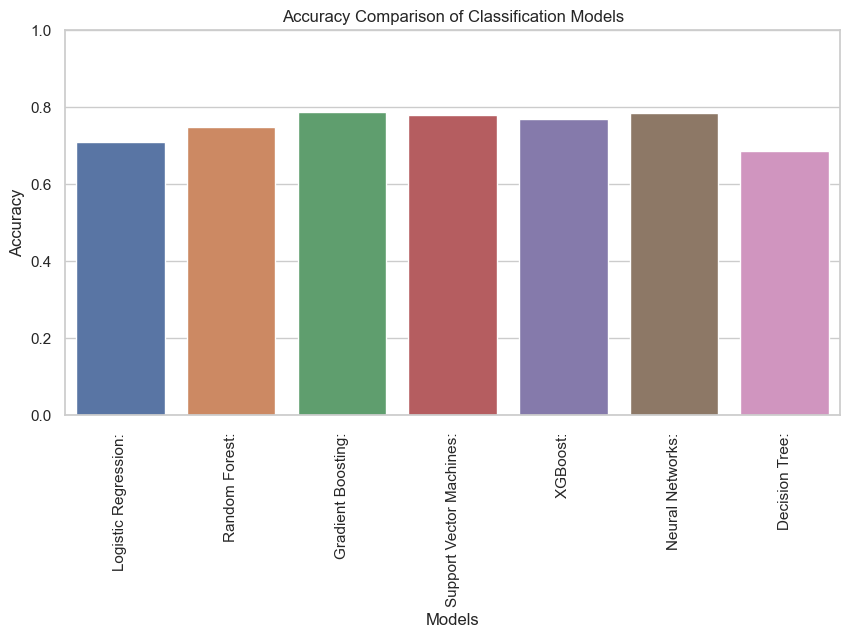

In [80]:
# Plot the accuracy using a count plot
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.barplot(data=df_results, x='Model', y='Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(rotation=90)
plt.show()

The highest accuracy achieved for the Gradient Boosting Classifier model is 0.8064  i.e 80.64%.

# Step 8 -Model Evaluation

In [81]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [82]:
gb_classifier= GradientBoostingClassifier(random_state=0)

In [83]:
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [84]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [85]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7877133105802048


In [87]:
from sklearn.metrics import classification_report, roc_auc_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       837
           1       0.74      0.78      0.76       628

    accuracy                           0.79      1465
   macro avg       0.78      0.79      0.78      1465
weighted avg       0.79      0.79      0.79      1465

Precision: 0.7397881996974282
Recall: 0.7786624203821656
F1-score: 0.7587276958882855
AUC-ROC Score: 0.7865833009915607


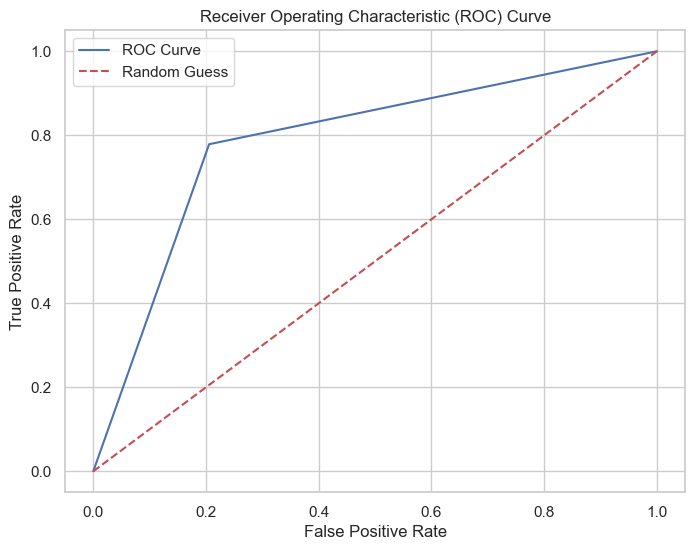

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

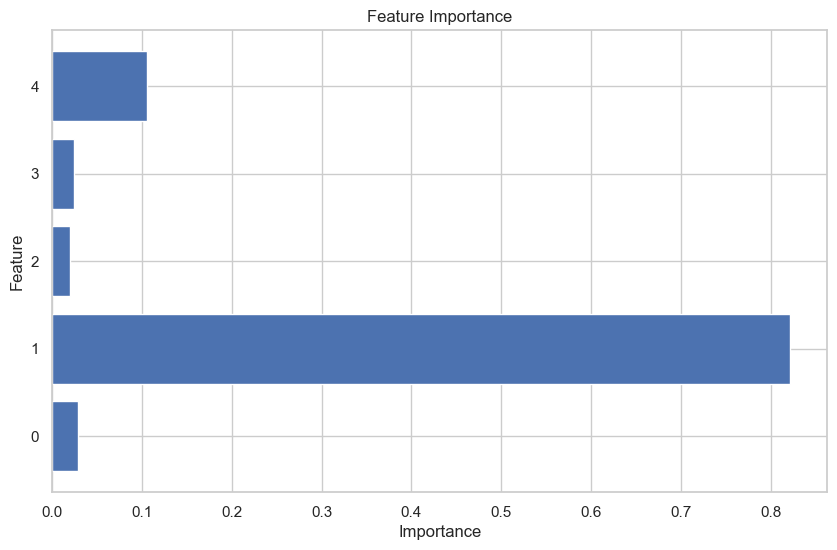

In [89]:
# Get feature importances
importances = model_3.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances = pd.DataFrame({'Feature': pd.DataFrame(x_train).columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define the column transformer to one-hot encode the categorical column(s)
categorical_columns = ['Specialization','Origin']
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), categorical_columns)],
                                 remainder='passthrough')

# Transform the features to include one-hot encoding
X_encoded =preprocessor.fit_transform(X)

# Initialize the classification model (e.g., GradientBoostingClassifier)
model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.77474403 0.78242321 0.77303754 0.79692833 0.77303754]
Average Cross-Validation Score: 0.7800341296928328


# Model Saving

In [91]:
import joblib
import pickle

In [92]:
best_model = GradientBoostingClassifier()

In [93]:
# Refit the best model on the entire dataset
best_model.fit(X_scaled, y)

GradientBoostingClassifier()

In [94]:
joblib.dump(best_model,'gbc_classify.pkl')

['gbc_classify.pkl']

# ---------------------------------------------- Thank You!------------------------------------------------